### (a) Perform a time series analysis on the airline data set for the years 1949- 1959.

In [1]:
### Import data and plot the ts

airdata = read.csv("airpass.csv",header = T,sep = ",")

### Train test split
airpass.ts      = ts(airdata$airpass, frequency = 12, start = c(1949,1), end = c(1959, 12)) # years 1949- 1959.
airpass.ts
airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
airpass.ts.test



     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

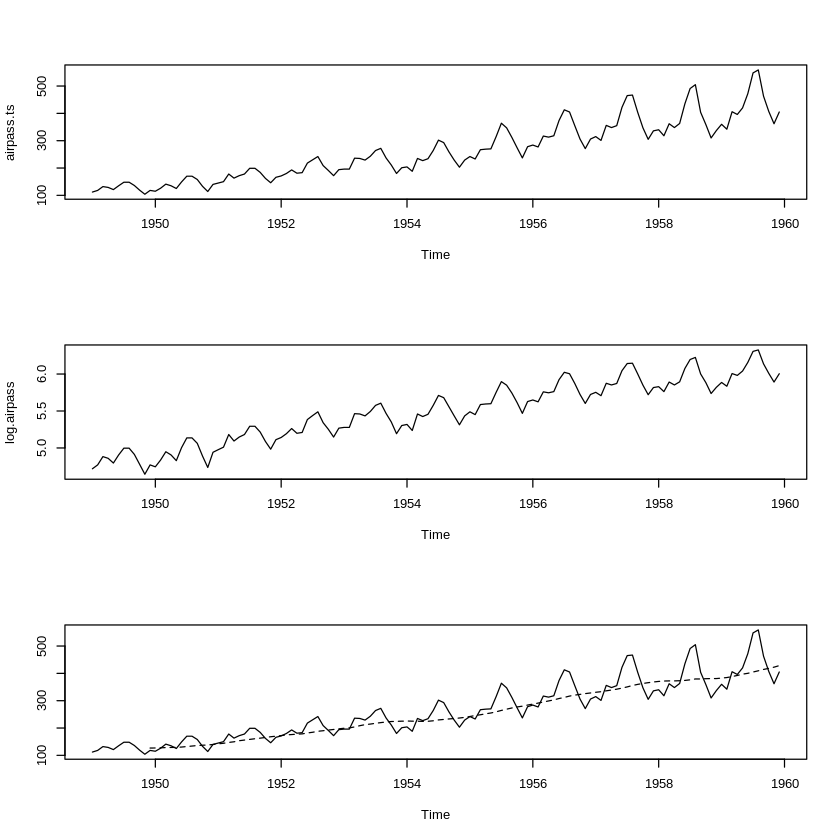

In [2]:
par(mfrow=c(3,1))
plot(airpass.ts)

### Log 
log.airpass <- log(airpass.ts)
plot(log.airpass, type = 'l')

## Generate a moving average line and add it in the plot
library('TTR')
airpass.ma <- SMA(airpass.ts, n=12) 
ts.plot(airpass.ts, airpass.ma, lty=c(1,2))

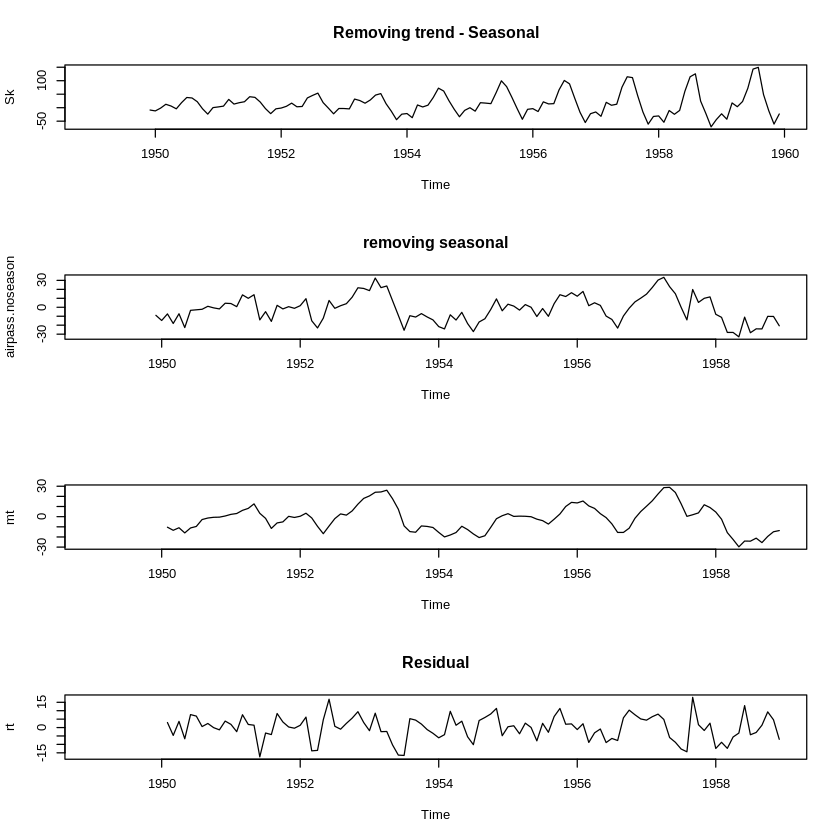

In [3]:
par(mfrow=c(4,1))
### Seasonal Compoment
Sk <- airpass.ts - airpass.ma  ### To estimate the seasonal component, is to remove the moving average (trend) from the original time series
plot(Sk, main = 'Removing trend - Seasonal')

airpass.noseason <- Sk - lag(Sk, k=12)
plot(airpass.noseason, main = 'removing seasonal')

### 3 period simple moving average to the deseasonalized data
mt <- SMA(airpass.noseason, n = 3, main = 'MA3 period smooth out')
plot(mt)

### Plot the residule and now it looks like white noise
rt <- airpass.noseason - mt
plot(rt, main =  'Residual')

### (a) Perform a time series analysis on the airline data set for the years 1949- 1959.

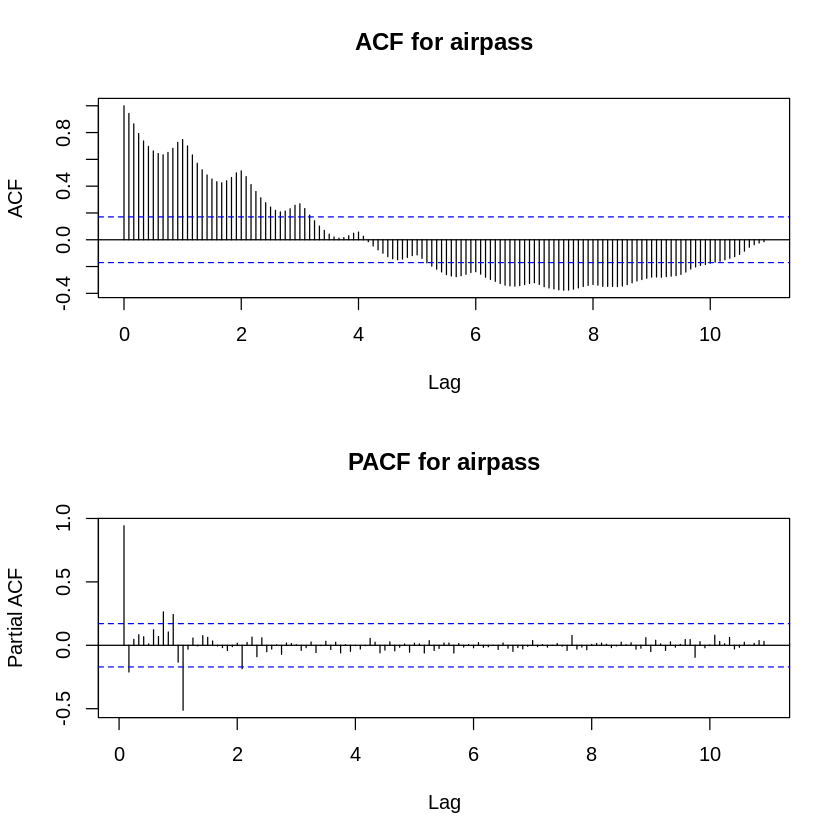

In [4]:
par(mfrow=c(2,1))
library(forecast)

acf(airpass.ts, lag.max = 1000, main = "ACF for airpass")
### Since the ACF(1) is positive , this suggest an AR 1 model
### The ACF also suggest seasonality

pacf(airpass.ts, lag.max = 1000, main = "PACF for airpass")
## This suggest an MA 1 model

In [5]:
### Take a seasonal difference. Check differences. If its ACF has sig neg at lag 12, use seasonal MA

### (b) Forecast the next 12 values for the year 1960 and compute the corre-sponding 95% forecasting intervals.  You should also plot out the graph of the forecasts.

In [6]:
### Fit a model with difference

In [7]:
### Train
model_0 = auto.arima(airpass.ts, d=1, approximation=FALSE)### Approximation what does it do
### This result correspond to the positive ACF(1) which suggest AR(1), 1st diff. 1 seasonal diff. 
### And if we take the diff and look at ACF, there should not be any neg/pos sig in lag 12 and 24, which means no MA and AR term. 

In [8]:
model_0

Series: airpass.ts 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 109.8:  log likelihood=-447.95
AIC=899.9   AICc=900.01   BIC=905.46

In [9]:
#library(astsa)
#sarima(airpass.ts.test, order = c(1,1,0), seasonal = list(0,1,0))
# Doesnt work

         Point Forecast    Lo 95    Hi 95
Jan 1960       424.1099 403.5724 444.6474
Feb 1960       407.0557 381.2989 432.8125
Mar 1960       470.8257 440.0971 501.5544
Apr 1960       460.8817 426.0208 495.7426
May 1960       484.8681 446.2846 523.4515
Jun 1960       536.8714 494.9011 578.8417
Jul 1960       612.8706 567.7655 657.9757
Aug 1960       623.8708 575.8354 671.9062
Sep 1960       527.8707 477.0737 578.6677
Oct 1960       471.8707 418.4547 525.2868
Nov 1960       426.8707 370.9582 482.7832
Dec 1960       469.8707 411.5685 528.1729

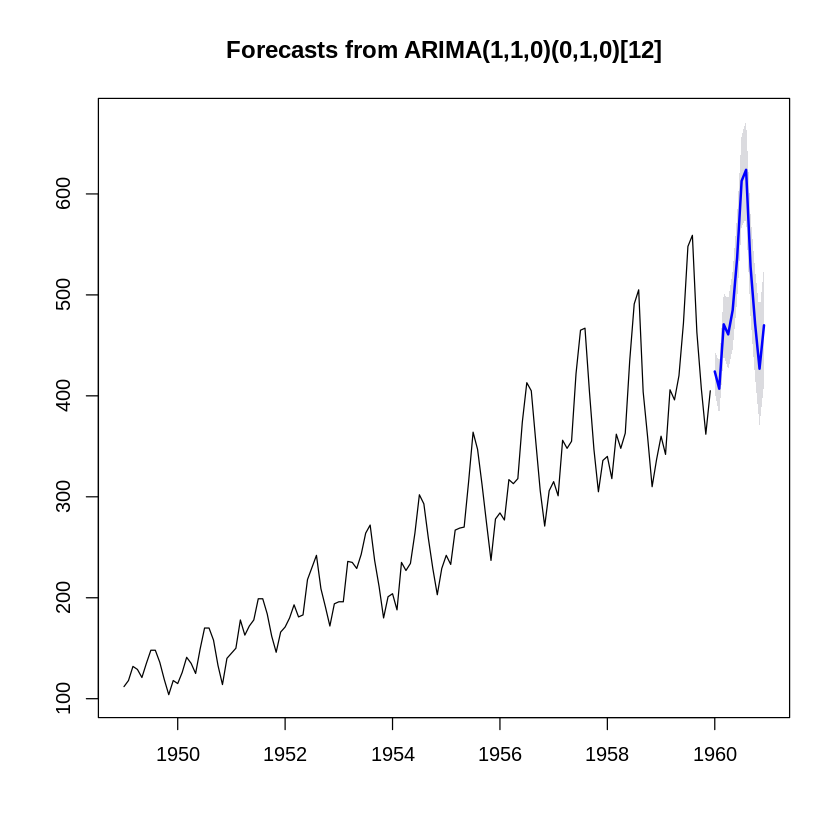

In [10]:
### Predict
model_0_forecast <- forecast(model_0, h = 12, level = 95)
model_0_forecast
plot(model_0_forecast)

In [11]:
### Lets validate the above assumptions: Take the 1st order differencing 
airpass.ts.diff  <- diff(airpass.ts, lag = 1)

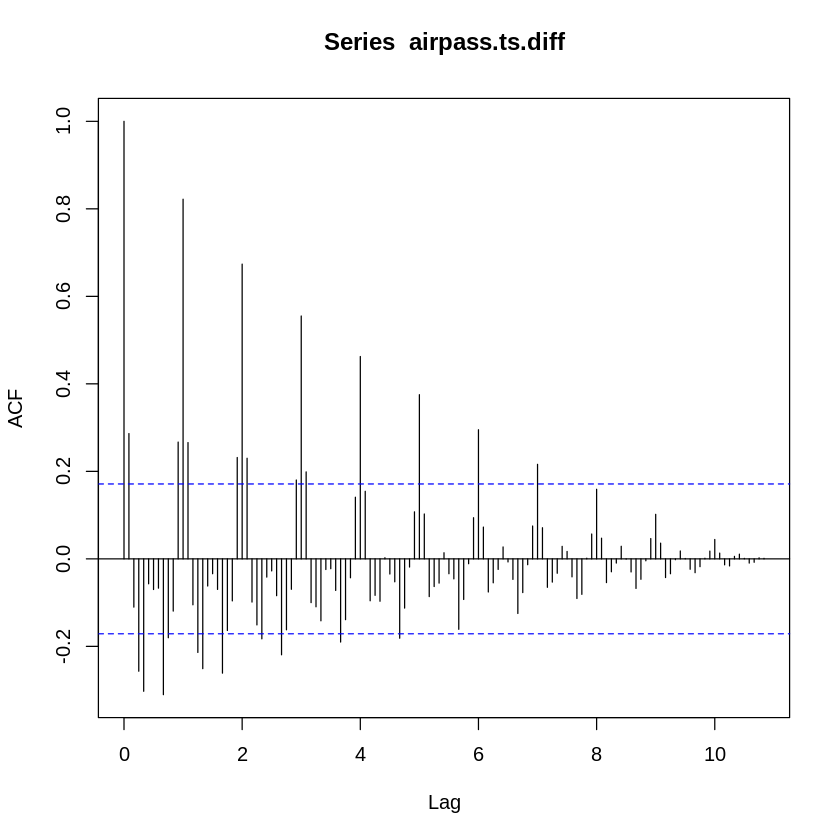

In [12]:
acf(airpass.ts.diff, lag.max = 600)


In [13]:
### Check residules

In [14]:
### Check the ACF of residules

In [15]:

airpass.ts      = ts(airdata$airpass, frequency = 12, start = c(1949,1), end = c(1959, 12)) # years 1949- 1959.
airpass.ts
airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
airpass.ts.test


     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

         Point Forecast    Lo 95    Hi 95
Jan 1960       424.1099 403.5724 444.6474
Feb 1960       407.0557 381.2989 432.8125
Mar 1960       470.8257 440.0971 501.5544
Apr 1960       460.8817 426.0208 495.7426
May 1960       484.8681 446.2846 523.4515
Jun 1960       536.8714 494.9011 578.8417
Jul 1960       612.8706 567.7655 657.9757
Aug 1960       623.8708 575.8354 671.9062
Sep 1960       527.8707 477.0737 578.6677
Oct 1960       471.8707 418.4547 525.2868
Nov 1960       426.8707 370.9582 482.7832
Dec 1960       469.8707 411.5685 528.1729

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

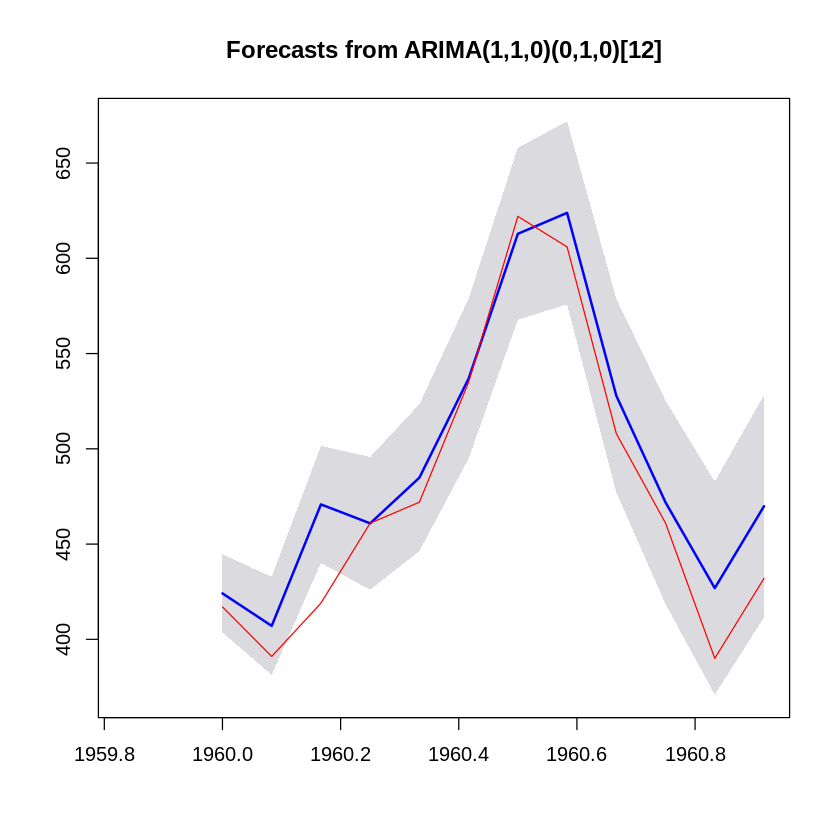

In [16]:
### train_test_split
airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
### Plot

model_0_forecast
airpass.ts.test
plot(model_0_forecast, include = 0)
lines(airpass.ts.test, col = 'red')
#legend(1978, 155, c("Prod", "Forecast"), lty = c(1, 1), col = c("red", "red"))

### (c) Evaluate the forecast using the prediction mean squares.

In [17]:
mse <- mean((model_0_forecast$mean - airpass.ts.test)^2)
mse

[1] 572.7264

### 4.  Perform a time series analysis on the weekly exchange rate between theU.S. dollar and the pound sterling for the year 1980 - 1988.  Answer thefollowing:

### (a) Is the exchange rate stationary?

In [18]:
exchange_data = read.csv("exchange.csv",header = F,sep = ",")

In [19]:
exchange.ts = ts(exchange_data, frequency = 12, start = c(1980,1), end = c(1988, 12)) 

In [20]:
exchange.ts

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1980 2.24 2.26 2.29 2.26 2.27 2.30 2.30 2.28 2.27 2.23 2.21 2.18
1981 2.17 2.14 2.20 2.22 2.18 2.26 2.27 2.28 2.33 2.35 2.33 2.34
1982 2.34 2.35 2.36 2.38 2.37 2.39 2.33 2.37 2.38 2.37 2.40 2.41
1983 2.41 2.39 2.39 2.39 2.40 2.42 2.44 2.44 2.42 2.40 2.36 2.36
1984 2.34 2.32 2.34 2.34 2.38 2.40 2.39 2.41 2.37 2.34 2.28 2.31
1985 2.20 2.19 2.22 2.27 2.23 2.21 2.18 2.15 2.17 2.14 2.12 2.07
1986 2.07 2.07 1.93 1.96 1.97 1.95 1.89 1.89 1.86 1.84 1.84 1.79
1987 1.81 1.88 1.85 1.84 1.78 1.84 1.79 1.82 1.91 1.83 1.82 1.84
1988 1.88 1.91 1.90 1.96 1.94 1.89 1.88 1.89 1.91 1.92 1.87 1.87

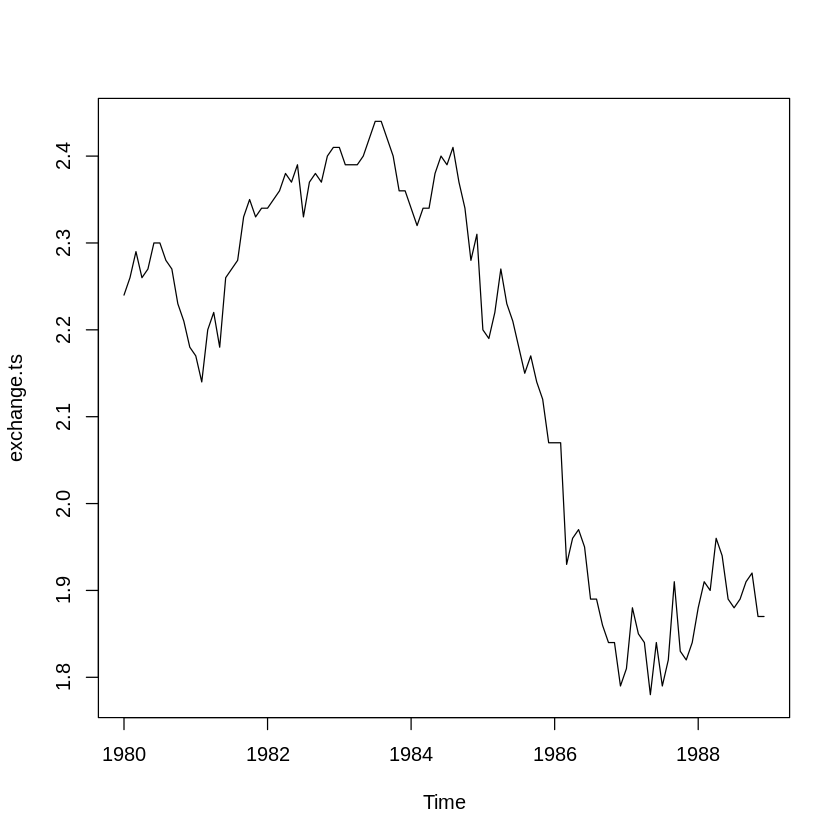

In [21]:
plot(exchange.ts)

### (b) Are there difference regimes?  Provide statistical tests.

In [22]:
Box.test(exchange.ts, lag = log(length(exchange.ts)))


	Box-Pierce test

data:  exchange.ts
X-squared = 386.93, df = 4.6821, p-value < 2.2e-16


In [23]:
exchange_diff  <- diff(exchange.ts, lag = 1)
exchange_diff

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1980        0.02  0.03 -0.03  0.01  0.03  0.00 -0.02 -0.01 -0.04 -0.02 -0.03
1981 -0.01 -0.03  0.06  0.02 -0.04  0.08  0.01  0.01  0.05  0.02 -0.02  0.01
1982  0.00  0.01  0.01  0.02 -0.01  0.02 -0.06  0.04  0.01 -0.01  0.03  0.01
1983  0.00 -0.02  0.00  0.00  0.01  0.02  0.02  0.00 -0.02 -0.02 -0.04  0.00
1984 -0.02 -0.02  0.02  0.00  0.04  0.02 -0.01  0.02 -0.04 -0.03 -0.06  0.03
1985 -0.11 -0.01  0.03  0.05 -0.04 -0.02 -0.03 -0.03  0.02 -0.03 -0.02 -0.05
1986  0.00  0.00 -0.14  0.03  0.01 -0.02 -0.06  0.00 -0.03 -0.02  0.00 -0.05
1987  0.02  0.07 -0.03 -0.01 -0.06  0.06 -0.05  0.03  0.09 -0.08 -0.01  0.02
1988  0.04  0.03 -0.01  0.06 -0.02 -0.05 -0.01  0.01  0.02  0.01 -0.05  0.00

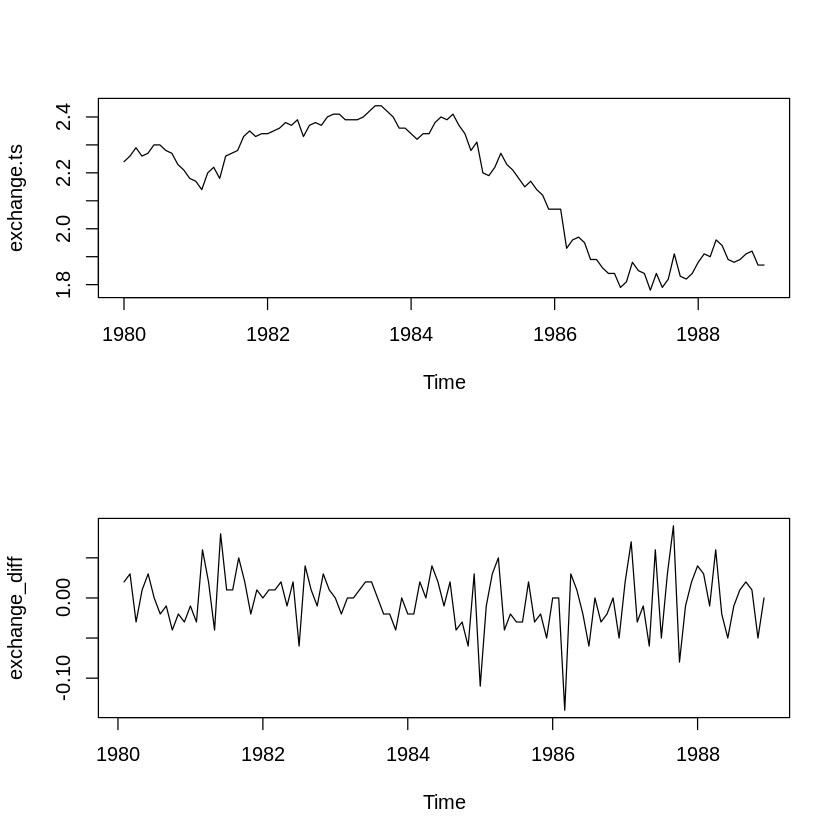

In [24]:
par(mfrow=c(2,1))
plot(exchange.ts)
plot(exchange_diff)

In [25]:
Box.test(exchange_diff)  ### now is stationary


	Box-Pierce test

data:  exchange_diff
X-squared = 1.5515, df = 1, p-value = 0.2129


### (c) What other information you need for better forecasting of the exchangerate?